<a href="https://colab.research.google.com/github/Sa-Fi/Convolutional-Neural-Network-project-/blob/main/Cats_and_Dog_2_using_CNN_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# connect the kaggle dataset api with the coolab
!kaggle datasets download -d tongpython/cat-and-dog

 92% 200M/218M [00:00<00:00, 254MB/s]
100% 218M/218M [00:00<00:00, 243MB/s]


In [ ]:
# unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# access the train and test data
train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/training_set/training_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/test_set/test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [ ]:
#normalize the image
def process (image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:

from keras.layers.convolutional.base_separable_conv import Conv
#build the CNN model
model = Sequential()
#1st layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#2nd Layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#3rd layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#flatten layer
model.add(Flatten())


#fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = 'Accuracy')

In [ ]:
history = model.fit(train_ds,
          epochs=10,
          validation_data=validation_ds )

Epoch 1/10
251/251 [==============================] - 37s 87ms/step - loss: 0.9010 - Accuracy: 0.5814 - val_loss: 0.8157 - val_Accuracy: 0.5096
Epoch 2/10
251/251 [==============================] - 22s 88ms/step - loss: 0.6467 - Accuracy: 0.6422 - val_loss: 0.6463 - val_Accuracy: 0.6416
Epoch 3/10
251/251 [==============================] - 22s 85ms/step - loss: 0.5696 - Accuracy: 0.7052 - val_loss: 0.6499 - val_Accuracy: 0.6070
Epoch 4/10
251/251 [==============================] - 24s 94ms/step - loss: 0.4941 - Accuracy: 0.7517 - val_loss: 0.6150 - val_Accuracy: 0.6980
Epoch 5/10
251/251 [==============================] - 22s 86ms/step - loss: 0.4324 - Accuracy: 0.7885 - val_loss: 0.5774 - val_Accuracy: 0.7197
Epoch 6/10
251/251 [==============================] - 23s 91ms/step - loss: 0.3533 - Accuracy: 0.8355 - val_loss: 0.5572 - val_Accuracy: 0.7435
Epoch 7/10
251/251 [==============================] - 21s 83ms/step - loss: 0.2649 - Accuracy: 0.8804 - val_loss: 0.7159 - val_Accuracy:

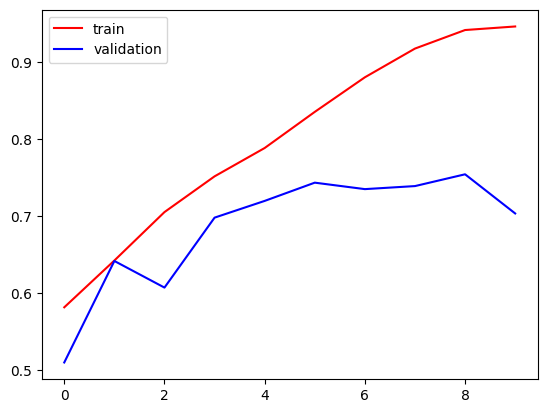

In [ ]:
import matplotlib.pyplot as plt
# training the and validation data accuracy
plt.plot(history.history['Accuracy'],color='red',label='train')
plt.plot(history.history['val_Accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

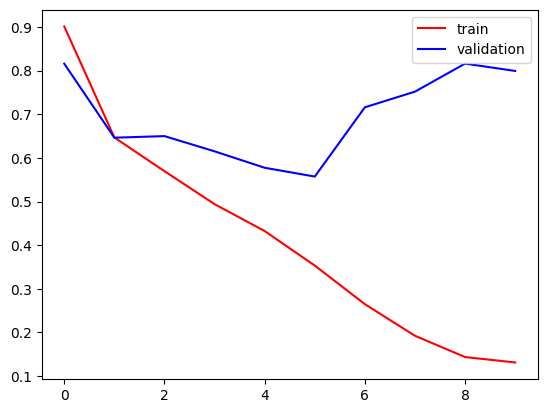

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

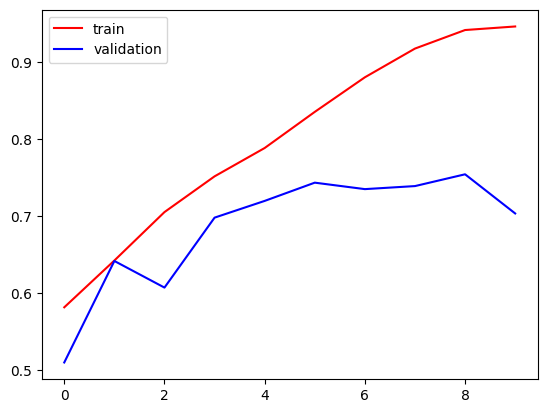

In [ ]:
plt.plot(history.history['Accuracy'],color='red',label='train')
plt.plot(history.history['val_Accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

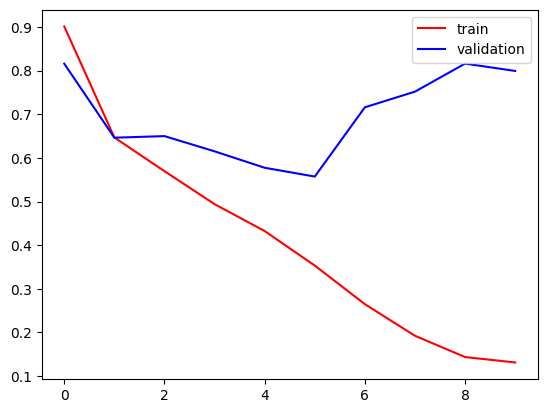

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# evaluate the model
import cv2
from google.colab.patches import cv2_imshow

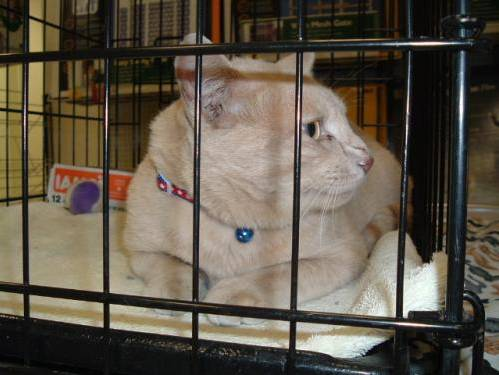

In [ ]:
test_img = cv2.imread('/content/test_set/test_set/cats/cat.4008.jpg')
cv2_imshow(test_img)

In [ ]:
test_img.shape

(375, 499, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 331ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread(input("Give image file path :"))
plt.imshow(test_img)
print(test_img.shape)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
result = model.predict(test_input)
if result[0][0]==0:
  print("bilai")
else:
  print("kutta")

In [ ]:
#save the model
model.save('Cats_vs_dog_2_using_CNN.h5')

In [ ]:
path = '/content/drive/MyDrive/Deep learning Save model/Cats_vs_dog_2_using_CNN.h5'
model.save(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

In [ ]:
#testing the downloaded model
model_deploy=keras.models.load_model('/content/Cats_vs_dog_2_using_CNN.h5')
res = model_deploy.predict(test_input)
if res[0][0]==0:
  print("bilai")
else:
  print("kutta")